In [21]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [8]:
file_path = Path("../Resources/metro_homes.csv")
metro_df = pd.read_csv(file_path)
metro_df.head()

,indicator_id,region_id,date,value
0,ZCON,102001,2020-06-30,272122.0
1,ZCON,394913,2020-06-30,498772.0
2,ZCON,753899,2020-06-30,547500.0
3,ZCON,394463,2020-06-30,206792.0
4,ZCON,394514,2020-06-30,184800.0


In [4]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [9]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

X = metro_df.index.values.reshape(-1,1)
y = metro_df['value']



In [10]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [11]:
predicted_y_values = model.predict(X)
predicted_y_values

array([192166.67808529, 192166.63190625, 192166.58572721, ...,
       132243.2792379 , 132243.23305886, 132243.18687982])

In [13]:
#Extracting coef, intercept

model.coef_
model.intercept_


192166.67808528667

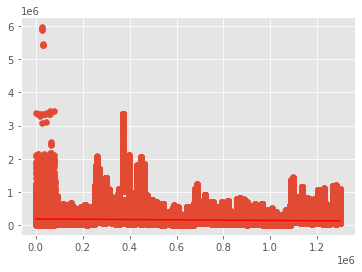

In [14]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [16]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [18]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 0.017557428247824913
R-squared (R2 ): 0.017557428247824913
Mean Squared Error (MSE): 16744026787.21396
Root Mean Squared Error (RMSE): 129398.71246350932
Standard Deviation: 130549.84736976889


In [26]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
#Create Model
classifier = LogisticRegression(solver='', random_state=1)
classifier

LogisticRegression(random_state=1, solver='saga')

In [30]:
# Train the data
classifier.fit(X_train, y_train)

MemoryError: Unable to allocate 2.27 TiB for an array with shape (973226, 320430) and data type float64

In [11]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [12]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [13]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [14]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [15]:
#Build LSTM Model

#def window_data(df, window, feature_col_number, target_col_number):
#    X = []
#    y = []
#    for i in range(len(df) - window - 1):
#        features = df.iloc[i:(i + window), feature_col_number]
#        target = df.iloc[(i + window), target_col_number]
#        X.append(features)
#        y.append(target)
#    return np.array(X), np.array(y).reshape(-1, 1)

In [16]:
# Predict Closing Prices using a 10 day window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
#window_size = 10

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
#feature_column = 0
#target_column = 1
#X, y = window_data(df, window_size, feature_column, target_column)

In [17]:
# Use 70% of the data for training and the remaineder for testing
#split = int(0.7 * len(X))

#X_train = X[: split]
#X_test = X[split:]
#y_train = y [: split]
#y_test = y[split:]

In [18]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
#scaler = MinMaxScaler()
#scaler.fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#scaler.fit(y)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


In [19]:
# Reshape the features for the model
#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [21]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

#model = Sequential()

#number_units = 5
#dropout_fraction = 0.2


# Layer 1
#model.add(LSTM(
#    units=number_units,
#    return_sequences=True,
#    input_shape=(X_train.shape[1], 1))
#    )
#model.add(Dropout(dropout_fraction))

# Layer 2
#model.add(LSTM(units=number_units, return_sequences=True))
#model.add(Dropout(dropout_fraction))

# Layer 3
#model.add(LSTM(units=number_units))
#model.add(Dropout(dropout_fraction))

# Output layer
#model.add(Dense(1))

In [22]:
# Compile the model
#model.compile(optimizer='adam', loss="mean_squared_error")

In [23]:
# Summarize the model
#model.summary()

In [24]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
#model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

In [25]:
# Evaluate the model
#model.evaluate(X_test, y_test)

In [26]:
# Make some predictions
#predicted = model.predict(X_test)

In [27]:
# Recover the original prices instead of the scaled version
#predicted_prices = scaler.inverse_transform(predicted)
#real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [28]:
# Create a DataFrame of Real and Predicted values
#housing = pd.DataFrame({
#    "Real": real_prices.ravel(),
#    "Predicted": predicted_prices.ravel()
#}, index = df.index[-len(real_prices): ]) 

#housing.head()

In [29]:
# Plot the real vs predicted values as a line chart
#housing.plot()